<a href="https://colab.research.google.com/github/rakeshsurampalli/smart_investment/blob/master/RELIANCE_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


In [3]:
import pandas as pd
import numpy as np
from google.colab import files
from pandas import datetime
import matplotlib.pyplot as plt


In [4]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [5]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [6]:

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [11]:

#2. Get the file
downloaded = drive.CreateFile({'id':'1uXnme3jK0iwMN6tBujDWVU1Td2fj2k3T'}) # replace the id with id of file you want to access
downloaded.GetContentFile('RELIANCE20.csv')

In [12]:
import pandas as pd
sales = pd.read_csv('RELIANCE20.csv')

In [13]:
sales.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,16.009800,16.095699,15.904300,16.0683,2.412877,47600787.0
1,1996-01-02,16.029301,16.107401,15.826200,15.9434,2.394122,77143764.0
2,1996-01-03,16.205000,16.943001,16.029301,16.0644,2.412292,95695836.0
3,1996-01-04,15.912100,15.962900,15.701300,15.9160,2.390007,99159504.0
4,1996-01-05,15.853600,15.853600,15.670000,15.8067,2.373594,76213503.0


In [14]:
sales = sales.Close

In [32]:


#2. Get the file
rsi = drive.CreateFile({'id':'1o3tKOp2B3BJrJ5zIPBVARaAjWLslEnXR'}) # replace the id with id of file you want to access
rsi.GetContentFile('rsi.csv')

In [33]:
import pandas as pd
RSI = pd.read_csv('rsi.csv')

In [34]:
RSI.columns

Index(['17/07/20', '14', 'close'], dtype='object')

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

MessageError: ignored

In [ ]:
import io
def parser(x):
  return datetime.strptime(x,'%d/%m/%y')

sales = pd.read_csv(io.StringIO(uploaded['reliance1.csv'].decode('utf-8')),index_col=0,parse_dates=[0],date_parser=parser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
sales.head()
print("checking if any null values are present\n", sales.isna().sum())

checking if any null values are present
 126


In [ ]:
sales = sales.dropna()
print("checking if any null values are present\n", sales.isna().sum())

checking if any null values are present
 0


In [15]:
RSI.head()
print("checking if any null values are present\n", RSI.isna().sum())

checking if any null values are present
 17/07/20    0
14          0
66.89439    0
dtype: int64


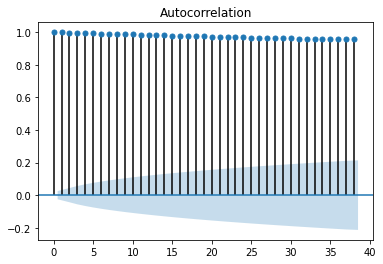

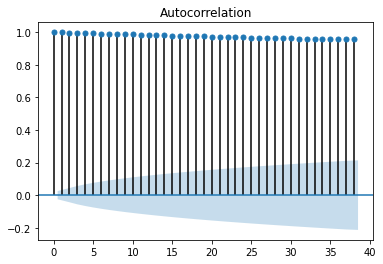

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [ ]:
sales_diff = sales.diff(periods=1)

In [ ]:
sales = sales_diff[1:]
sales.head()

1   -0.1249
2    0.1210
3   -0.1484
4   -0.1093
5   -0.6326
Name: Close, dtype: float64

In [ ]:
 X = sales
#X = np.random.rand(32).astype(np.float32)+58
time = np.arange(6027)

print(X)
X.size
split_time = 5500
time_train = time[:split_time]
time_valid = time[split_time:]
x_train = X[:split_time]
x_test = X[split_time:]


0         16.068300
1         15.943400
2         16.064400
3         15.916000
4         15.806700
           ...     
6148    1431.550049
6149    1424.050049
6150    1445.550049
6151    1472.250000
6152    1464.400024
Name: Close, Length: 6027, dtype: float64


In [36]:
 Y = RSI.close
#X = np.random.rand(32).astype(np.float32)+58
times = np.arange(3803)

print(Y)
Y.size
split_times = 3276
time_trains = times[:split_times]
time_valids = times[split_times:]
x_trains = Y[:split_times]
x_tests = Y[split_times:]


0       61.39570
1       61.47900
2       72.60824
3       75.74784
4       72.21863
          ...   
3798    48.46000
3799    42.14000
3800    28.98000
3801    24.65000
3802    26.38000
Name: close, Length: 3803, dtype: float64


In [37]:
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [38]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train,window_size,batch_size = 128,shuffle_buffer = shuffle_buffer_size)

NameError: ignored

In [39]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_sets = windowed_dataset(x_trains,window_size,batch_size = 128,shuffle_buffer = shuffle_buffer_size)

In [45]:
model = keras.models.Sequential([
                      keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=-1)),
                      #keras.layers.SimpleRNN(20, return_sequences = True,
                                               #input_shape = [None,1]),
                      keras.layers.Dense(20),
                      keras.layers.Dense(10),
                      keras.layers.Dense(1),
                      keras.layers.Lambda(lambda x: x*100.0)

               
])

In [46]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/20))

In [47]:
optimizer = tf.keras.optimizers.SGD(lr=1e-8,momentum=0.9)

In [48]:
model.compile(loss=tf.keras.losses.Huber(),optimizer='adam',metrics=["mae"])

In [ ]:
history = model.fit(train_set,epochs=500,callbacks=[lr_schedule])

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

45/45 [==============================] - 1s 19ms/step - loss: 373.7364 - mae: 374.2364 - lr: 1.0000e-08
Epoch 2/500
45/45 [==============================] - 1s 19ms/step - loss: 373.7333 - mae: 374.2333 - lr: 1.1220e-08
Epoch 3/500
45/45 [==============================] - 1s 19ms/step - loss: 373.7298 - mae: 374.2298 - lr: 1.2589e-08
Epoch 4/500
45/45 [==============================] - 1s 19ms/step - loss: 373.7261 - mae: 374.2261 - lr: 1.4125e-08
Epoch 5/500
45/45 [=========================

In [49]:
RSI_history = model.fit(train_sets,epochs=149,callbacks=[lr_schedule])

Epoch 1/149

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

26/26 [==============================] - 0s 11ms/step - loss: 546.7911 - mae: 547.2911 - lr: 1.0000e-08
Epoch 2/149
26/26 [==============================] - 0s 11ms/step - loss: 546.7686 - mae: 547.2686 - lr: 1.1220e-08
Epoch 3/149
26/26 [==============================] - 0s 10ms/step - loss: 546.7451 - mae: 547.2451 - lr: 1.2589e-08
Epoch 4/149
26/26 [==============================] - 0s 12ms/step - loss: 546.7193 - mae: 547.2193 - lr: 1.4125e-08
Epoch 5/149
26/26 [=========================

In [ ]:
predictions = []
for time in range(len(X) - window_size):
  predictions.append(model.predict(X[time:time + window_size,np.newaxis]))

predictions = predictions[split_time-window_size:]
results = np.array(predictions)[:, 0, 0]
print(results)

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_test)
plot_series(time_valid, results)


[[25.102674]
 [22.575531]
 [24.360792]
 [25.096767]
 [20.692741]
 [20.553822]
 [20.884857]
 [21.54399 ]
 [21.866154]
 [23.290815]
 [23.524324]
 [23.837624]
 [24.443548]
 [26.25542 ]
 [27.425882]
 [27.473175]
 [27.57367 ]
 [27.576622]
 [31.209219]
 [27.730322]
 [28.525412]
 [28.965813]
 [27.984514]
 [27.180561]
 [27.22193 ]
 [29.101784]
 [30.148108]
 [30.739254]
 [31.59937 ]
 [32.722546]
 [32.639786]
 [30.697876]
 [31.389517]
 [31.27129 ]
 [30.455503]
 [33.384632]
 [33.0063  ]
 [35.894043]
 [33.573795]
 [30.325455]
 [31.74716 ]
 [26.54213 ]
 [26.394337]
 [25.543087]
 [25.625843]
 [25.998262]
 [25.102674]
 [24.390352]
 [25.203184]
 [27.316523]
 [28.2594  ]
 [28.88602 ]
 [25.031746]
 [24.2869  ]
 [24.428776]
 [24.801191]
 [24.919432]
 [25.702698]
 [25.42485 ]
 [26.122402]
 [24.411034]
 [25.079037]
 [25.141108]
 [25.640625]
 [24.322369]
 [23.403143]
 [24.094788]
 [24.960802]
 [25.108593]
 [23.376534]
 [24.538132]
 [27.16874 ]
 [29.107689]
 [28.605223]
 [28.72936 ]
 [27.680075]
 [28.256443]

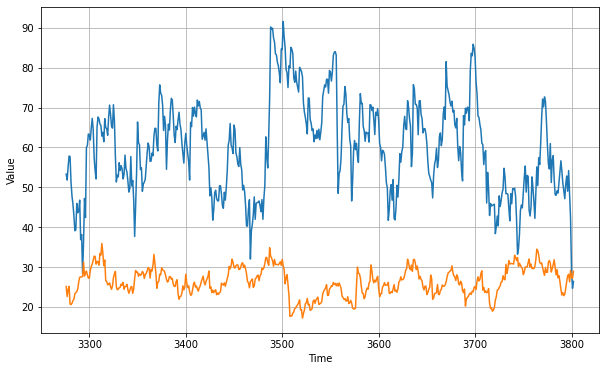

In [52]:
RSI_predictions = []
for time in range(len(Y) - window_size):
  RSI_predictions.append(model.predict(Y[time:time + window_size,np.newaxis]))

RSI_predictions = RSI_predictions[split_times-window_size:]
RSI_results = np.array(RSI_predictions)[:, 0, 0]
print(RSI_results)

plt.figure(figsize=(10, 6))

plot_series(time_valids, x_tests)
plot_series(time_valids, RSI_results)
